

# Project: Gapminder World - Analysis


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Gapminder dataset has information about various indicators over a timeline and for different countries. 

I have selected the 5 indicators from dataset - 1.Child Mortality 2.Total fertility 3. Income per person 4. life expectancy 5. Population growth.

Data for various indicators is given from 1800 to 2100. I am not sure how data for future period is available, I have used timeline for my analysis - from 1970 to 2019.

Indicators :

1. **Child Mortality**

      0 to 5 years children dying per 1000 born
      
      
      
2. **Total Fertility**

      Numeber of children per women
      
      
      
3. **Income per person( GDP / capita , PPP  inflation - adjusted)**


    GDP per person adjusted for differences in purchasing power (in International dollars, 2011 fixed prices, PPP based on 2011 )
          
          
                                                                                                                                                             
      

4. **Life Expectancy**
    
    Number of years a new born child would live if current mortality pattern were to stay the same
    
    

5. **Population Growth**
    
    Annual population growth rate for yeat t is exponential rate of growth of mid year population from year t-1 to t, in percentage. population is based on facto definition of population , which counts all residents regardless of legal status and citizenships.



**Questions**

1. What characteristics define India based on 5 parameter - Child mortality, Child per women , population growth, life expectancy,income per person.
2. How population trend in changing in India and china from 1970 to 2020.
3. Which countries have worst child mortality in 2019. How it improved or become worst since 1970.
4. Mention country having highest income per peson each year since 2019. which country has maximum count in top list.

In [1]:
# Importing Packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Question 1       --  What characteristics define India based on 5 parameter - Child mortality, Child per women , population growth, life expectancy,income per person.


**Importing files**

In [2]:
population_growth = pd.read_csv('D:/Data Analyst NanoDegree/2. Investigate dataset/population_growth_annual_percent.csv')
life_expectancy = pd.read_csv('D:/Data Analyst NanoDegree/2. Investigate dataset/life_expectancy_years.csv')

income_per_person = pd.read_csv('D:/Data Analyst NanoDegree/2. Investigate dataset/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
child_per_women = pd.read_csv('D:/Data Analyst NanoDegree/2. Investigate dataset/children_per_woman_total_fertility.csv')
child_mortality = pd.read_csv('D:/Data Analyst NanoDegree/2. Investigate dataset/child_mortality_0_5_year_olds_dying_per_1000_born.csv')




**Each variant has years as column - need to convert it into one column. Then extract data for "India" from 1970 to 2019**

In [3]:
population_growth = population_growth.melt(id_vars = ['country'], var_name = 'Year', value_name = 'population_growth' )
india_population_growth = population_growth.query('country == "India"').loc[1822:,:].reset_index(drop = True)
india_population_growth
india_population_growth.head()

,country,Year,population_growth
0,India,1970,0.0220
1,India,1971,0.0226
2,India,1972,0.0230
3,India,1973,0.0233
4,India,1974,0.0233


In [4]:
life_expectancy = life_expectancy.melt(id_vars = ['country'], var_name = 'Year', value_name = 'life_expectancy' )
india_life_expectancy = life_expectancy.query('country == "India"').loc[31866:,:].reset_index(drop = True)
india_life_expectancy.head()

,country,Year,life_expectancy
0,India,1970,49.5
1,India,1971,49.9
2,India,1972,50.4
3,India,1973,51.0
4,India,1974,51.5


In [5]:
income_per_person = income_per_person.melt(id_vars = ['country'], var_name = 'Year', value_name = 'income_per_person' )
india_income_per_person = income_per_person.query('country == "India"').loc[32886:,:].reset_index(drop = True)
india_income_per_person.head()

,country,Year,income_per_person
0,India,1970,1190
1,India,1971,1180
2,India,1972,1150
3,India,1973,1180
4,India,1974,1170


In [6]:
child_per_women = child_per_women.melt(id_vars = ['country'], var_name = 'Year', value_name = 'child_per_women' )
india_child_per_women = child_per_women.query('country == "India"').loc[31354:,:].reset_index(drop = True)
india_child_per_women.head()


,country,Year,child_per_women
0,India,1970,5.59
1,India,1971,5.52
2,India,1972,5.44
3,India,1973,5.36
4,India,1974,5.28


In [7]:
child_mortality = child_mortality.melt(id_vars = ['country'], var_name = 'Year', value_name = 'child_mortality' )
india_child_mortality = child_mortality.query('country == "India"').loc[33227:,:].reset_index(drop = True)
india_child_mortality.head()

,country,Year,child_mortality
0,India,1970,214.0
1,India,1971,211.0
2,India,1972,207.0
3,India,1973,203.0
4,India,1974,199.0


**Combinig data variants and to form one table for india containg all variannts from 1970 to 2019**

In [8]:
df = pd.merge(india_child_per_women,india_child_mortality, how = 'inner',on = 'Year')
df.drop(['country_x','country_y'], axis =1, inplace= True )
df.head()

,Year,child_per_women,child_mortality
0,1970,5.59,214.0
1,1971,5.52,211.0
2,1972,5.44,207.0
3,1973,5.36,203.0
4,1974,5.28,199.0


In [9]:
df = pd.merge(df,india_income_per_person,how = 'inner' , on = 'Year' )
df.drop('country', axis = 1, inplace = True)
df.head()

,Year,child_per_women,child_mortality,income_per_person
0,1970,5.59,214.0,1190
1,1971,5.52,211.0,1180
2,1972,5.44,207.0,1150
3,1973,5.36,203.0,1180
4,1974,5.28,199.0,1170


In [10]:
df = pd.merge(df,india_population_growth,how = 'inner', on = 'Year')
df.drop('country', axis = 1, inplace = True)
df.head()

,Year,child_per_women,child_mortality,income_per_person,population_growth
0,1970,5.59,214.0,1190,0.0220
1,1971,5.52,211.0,1180,0.0226
2,1972,5.44,207.0,1150,0.0230
3,1973,5.36,203.0,1180,0.0233
4,1974,5.28,199.0,1170,0.0233


In [11]:
df = pd.merge(df,india_life_expectancy,how = 'inner', on = 'Year')
df.drop('country', axis = 1, inplace = True)
df.head()

,Year,child_per_women,child_mortality,income_per_person,population_growth,life_expectancy
0,1970,5.59,214.0,1190,0.0220,49.5
1,1971,5.52,211.0,1180,0.0226,49.9
2,1972,5.44,207.0,1150,0.0230,50.4
3,1973,5.36,203.0,1180,0.0233,51.0
4,1974,5.28,199.0,1170,0.0233,51.5


In [12]:
df.dtypes

Year                  object
child_per_women      float64
child_mortality      float64
income_per_person      int64
population_growth    float64
life_expectancy      float64
dtype: object

**converting "Year" column from string to "int"**

In [18]:
df['Year'] = (df['Year']).astype(int)

**checking any null value**

In [14]:
df.isna().any()

Year                 False
child_per_women      False
child_mortality      False
income_per_person    False
population_growth    False
life_expectancy      False
dtype: bool

**checking data types**

In [15]:
df.dtypes

Year                  object
child_per_women      float64
child_mortality      float64
income_per_person      int64
population_growth    float64
life_expectancy      float64
dtype: object

**checking data variables distribution**

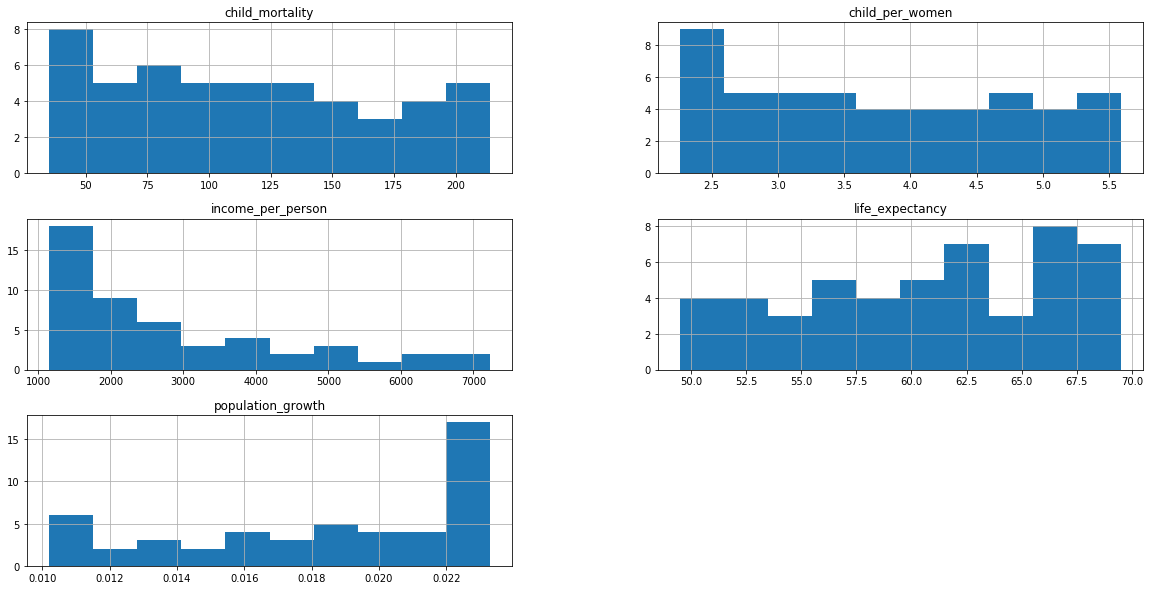

In [16]:
plt.rcParams['figure.figsize'] = (20,10)
df.hist();


**Plotting trend lines for each parameter**

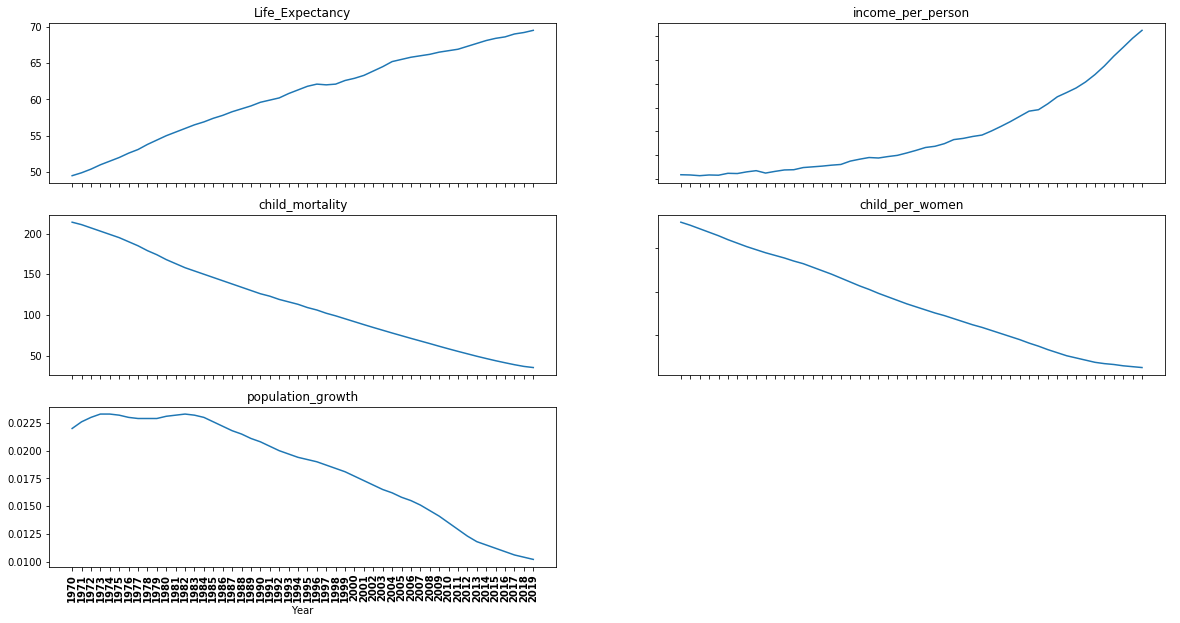

In [17]:
fig, axs = plt.subplots(3,2)
axs[0,0].plot(df['Year'],df['life_expectancy'])
axs[0,0].set_title('Life_Expectancy')
axs[0,1].plot(df['Year'],df['income_per_person'])
axs[0,1].set_title('income_per_person')
axs[1,0].plot(df['Year'],df['child_mortality'])
axs[1,0].set_title('child_mortality')
axs[1,1].plot(df['Year'],df['child_per_women'])
axs[1,1].set_title('child_per_women')
axs[2,0].plot(df['Year'], df['population_growth'])
axs[2,0].set_title('population_growth')
axs[2,1].axis('off')


for tick in axs[2,0].get_xticklabels():
    tick.set_rotation(90)
    tick.set_fontsize(10)
    tick.set_fontweight('bold')





for ax in axs.flat:
    ax.set(xlabel='Year')
    
for ax in axs.flat:
    ax.label_outer()

**Describing statistics for parameters**

In [103]:
df.describe()

,Year,child_per_women,child_mortality,income_per_person,population_growth,life_expectancy
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1994.50000,3.766400,115.328000,2802.600000,0.018456,60.660000
std,14.57738,1.048289,54.419021,1705.416114,0.004400,5.943613
min,1970.00000,2.260000,35.200000,1150.000000,0.010200,49.500000
25%,1982.25000,2.840000,68.700000,1422.500000,0.015200,56.125000
50%,1994.50000,3.685000,111.000000,2155.000000,0.019300,61.550000
75%,2006.75000,4.685000,157.000000,3795.000000,0.022825,65.950000
max,2019.00000,5.590000,214.000000,7230.000000,0.023300,69.500000


# Question 2  Population growth trend comparison India Vs. China

**Getting china data extracted for "population growth"**

In [22]:

china_population_growth = population_growth.query('country == "China"').loc[1781:,:].reset_index(drop = True)
china_population_growth['Year'] = china_population_growth['Year'].astype(int)
china_population_growth.head()


,country,Year,population_growth
0,China,1970,0.0276
1,China,1971,0.0275
2,China,1972,0.0246
3,China,1973,0.0228
4,China,1974,0.0207


**Combining china and India population growth data set**

In [23]:
growth_df = pd.merge(china_population_growth ,df[['Year','population_growth']], how = 'inner', on = 'Year', suffixes = ('_china','_india'))
growth_df.drop('country', axis = 1 , inplace = True)


In [25]:
growth_df.head()

,Year,population_growth_china,population_growth_india
0,1970,0.0276,0.0220
1,1971,0.0275,0.0226
2,1972,0.0246,0.0230
3,1973,0.0228,0.0233
4,1974,0.0207,0.0233


**Change in population growth**

In [26]:
china_change_growth = (growth_df['population_growth_china'][0] - growth_df['population_growth_china'][49])/growth_df['population_growth_china'][0]
china_change_growth = china_change_growth * 100


India_change_growth = (growth_df['population_growth_india'][0] - growth_df['population_growth_india'][49])/growth_df['population_growth_india'][0]
India_change_growth = India_change_growth * 100


(china_change_growth,India_change_growth)

(87.06521739130434, 53.63636363636364)

**Plotting comaprison graphs**

Text(2019, 0.0101, '0.0102')

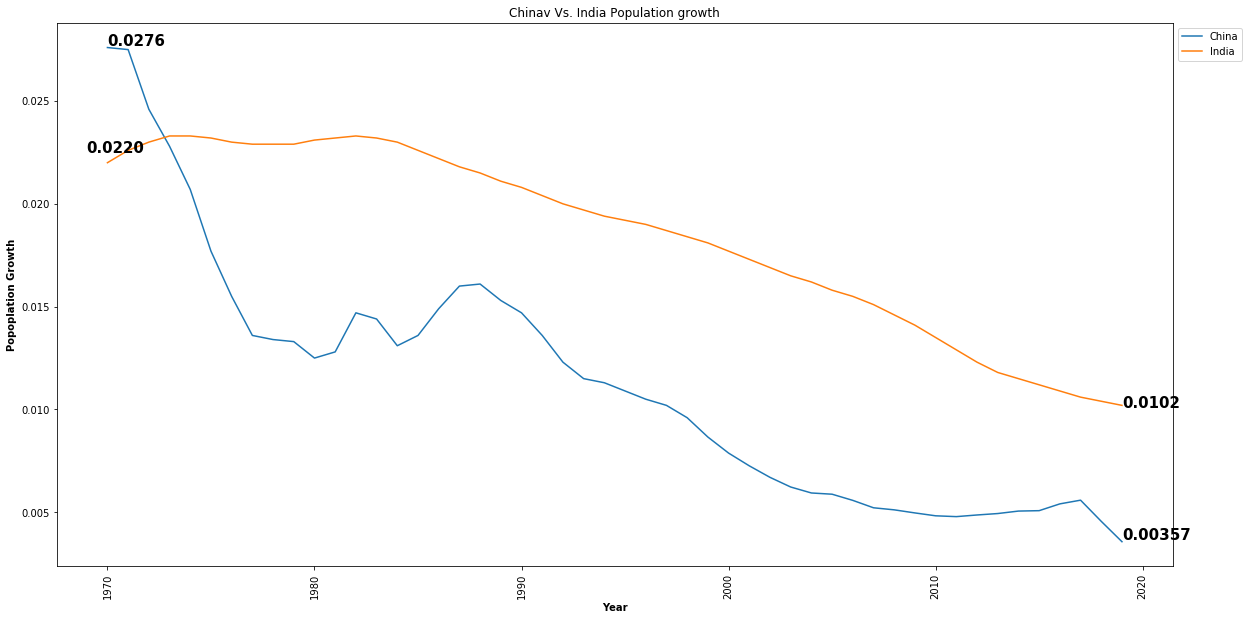

In [27]:
plt.plot(growth_df['Year'], growth_df['population_growth_china'] , label = 'China') ;
plt.plot(growth_df['Year'], growth_df['population_growth_india'] , label = 'India') ;
plt.xticks(rotation = 90)

plt.xlabel('Year', fontweight = 'bold')
plt.ylabel('Popoplation Growth', fontweight = 'bold')
plt.title('Chinav Vs. India Population growth')

plt.legend(loc="upper left", bbox_to_anchor= (1,1))

plt.annotate('0.0276',xy = (1970,0.0277), fontsize = 15,fontweight = 'bold')
plt.annotate('0.0220',xy = (1969,0.0225), fontsize = 15,fontweight = 'bold')
plt.annotate('0.00357',xy = (2019,0.00367), fontsize = 15,fontweight = 'bold')
plt.annotate('0.0102',xy = (2019,0.0101), fontsize = 15,fontweight = 'bold')



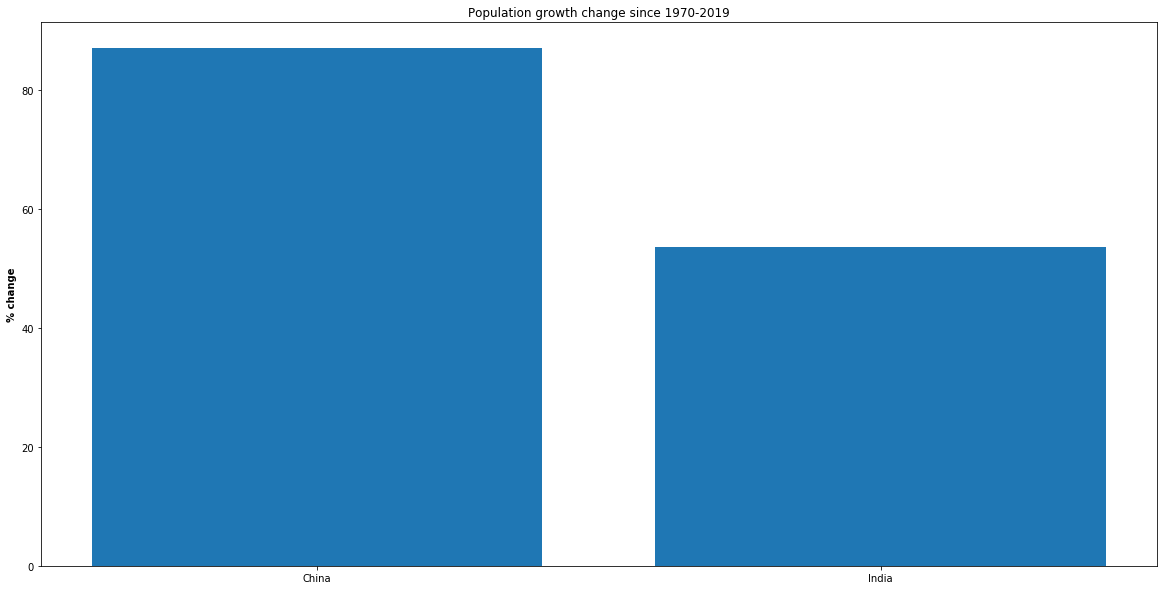

In [28]:
plt.bar(['China','India'],[china_change_growth,India_change_growth])
plt.title('Population growth change since 1970-2019')
plt.ylabel('% change', fontweight = 'bold');

# Question 3  --  Which 10 countries most affected by high child mortality in 2019. How they improved or affected compared to 1970

In [36]:
child_mortality_2019 = child_mortality.query('Year == "2019"').reset_index(drop = True)

child_mortality_2019.head()

,country,Year,child_mortality
0,Afghanistan,2019,60.10
1,Albania,2019,8.68
2,Algeria,2019,22.80
3,Andorra,2019,2.87
4,Angola,2019,74.50


In [90]:
child_mortality_1970 = child_mortality.query('Year == "1970"').reset_index(drop = True)
child_mortality_1970.head()

,country,Year,child_mortality
0,Afghanistan,1970,303.0
1,Albania,1970,126.0
2,Algeria,1970,240.0
3,Andorra,1970,24.4
4,Angola,1970,271.0


**Sorting data as per high rate**

In [61]:
child_mortality_2019.sort_values( by = 'child_mortality', inplace =True, ascending = False)
data_2019 = child_mortality_2019.head(10)
data_2019

,country,Year,child_mortality
157,Somalia,2019,119.0
126,Nigeria,2019,117.0
33,Chad,2019,117.0
32,Central African Republic,2019,113.0
152,Sierra Leone,2019,102.0
160,South Sudan,2019,97.6
69,Guinea,2019,97.3
105,Mali,2019,95.0
18,Benin,2019,90.9
38,"Congo, Dem. Rep.",2019,86.2


**getting data for countries affected in 2019 for year 1970**

In [91]:
child_mortality_1970 = child_mortality_1970.loc[[157,126,33,32,152,160,69,105,18,38]]
    
child_mortality_1970

,country,Year,child_mortality
157,Somalia,1970,237.0
126,Nigeria,1970,285.0
33,Chad,1970,259.0
32,Central African Republic,1970,224.0
152,Sierra Leone,1970,334.0
160,South Sudan,1970,328.0
69,Guinea,1970,324.0
105,Mali,1970,372.0
18,Benin,1970,262.0
38,"Congo, Dem. Rep.",1970,246.0


**Plotting grpahs for 1970 and 2019**

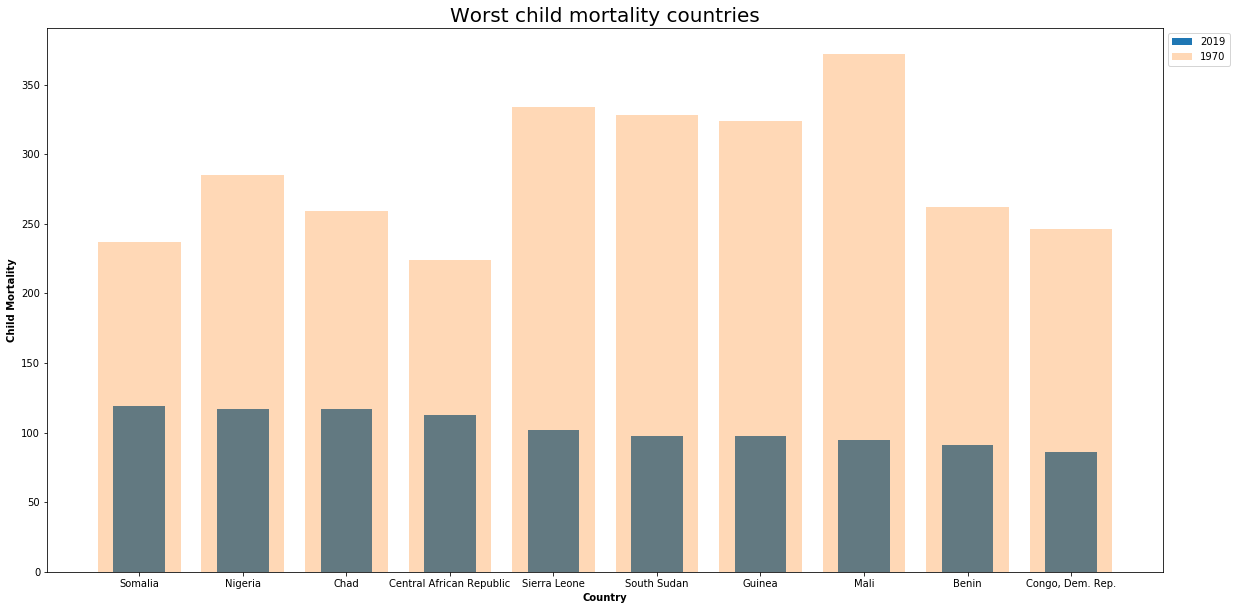

In [102]:
plt.bar(data['country'], data_2019['child_mortality'], label = '2019', alpha = 1 , width = -0.5)
plt.bar(child_mortality_1970['country'],child_mortality_1970['child_mortality'], label = 1970 , alpha = 0.3)
plt.title('Worst child mortality countries', fontsize = 20)
plt.legend(loc="upper left", bbox_to_anchor= (1,1))
plt.xlabel('Country', fontweight = 'bold')
plt.ylabel('Child Mortality', fontweight = 'bold');

# Question 4  -- Mention country having highest income per peson each year since 2019. which country has maximum count in top list.

**Extract data for income per person from 1970 to 2019**

In [157]:
data_income = income_per_person.loc[32810: 42459 , :]
data_income.head()


,country,Year,income_per_person
32810,Afghanistan,1970,2570
32811,Albania,1970,3570
32812,Algeria,1970,8070
32813,Andorra,1970,33200
32814,Angola,1970,5570


In [158]:
data_income.isna().any()
data_income.dtypes

country              object
Year                 object
income_per_person     int64
dtype: object

**Extract rows from each year with maximum income and corresponding country**

In [168]:
idx = data_income.groupby('Year')['income_per_person'].transform(max)== data_income['income_per_person']

max_income = data_income[idx]


max_income['country'].value_counts()

Qatar                   30
United Arab Emirates    18
Brunei                   2
Name: country, dtype: int64

<a id='conclusions'></a>
## Conclusions
**1**. In India following observations seen for following 5 parameters for year 1970 - 2019.
    - Life expectancy is increased in straight line. Life expectancy is always more than 45 years and average life expectancy in India is around 60 years for given period.
    - child per women number has reduced in straight line to 2019.Average number of children per women is around 4.
    - child mortality is reduced in straight line from 1970 to 2019. Around 115 children get died behind 1000.
    -  income per peson is increased along exponential curve.Most people have income less than 3000 and average income is 2802.
    - Population growth was almost constant since 1983 after which it reduced signiificantly upto 2019.
    
    
**2**. Starting from 1970 , China has higher growth rate compared to India but as we move across timeline China reaching lowest growth rate of population than India. China has reduced growth rate around **87%** while India has reduced growth rate by  around **53%**

**3**. Top ten countries with worst hit by child mortality is shown for 2019, it is compared to mortality in 1970 , starting point of data. It is reduced significantly over time since 1970.

**4**. After extracting rows whith maximum income per person each year , **Qatar** has maximum number of times (30 times) remained at top of list for highest income since 1970.